In [11]:
import os
from os import sys
sys.path.append('./data')
import numpy as np
import matplotlib.pyplot as plt
from species import *

In [12]:
Col = [
    '#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de',
    '#4393c3', '#2166ac'
]


def plot_all(spe, div=None, d=None, stop=True, ax=None):
    '''if d == None:
        d = np.arange(8) + 1'''
    for i in d:
        txt = './data/1dis' + str(i)
        raw = np.loadtxt(txt)
        txt_l = './data/2e-1dis' + str(i)
        raw_l = np.loadtxt(txt_l)
        txt_u = './data/5dis' + str(i)
        raw_u = np.loadtxt(txt_u)
        t = raw[:, 0]-1e6
        d = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        abu_l = raw_l[:, eval('krome_idx_' + spe)]
        abu_u = raw_u[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            abu_l /= raw_l[:, eval('krome_idx_' + div)]
            abu_u /= raw_u[:, eval('krome_idx_' + div)]
            d = 'n' + div
        ax.loglog(t, abu, label=txt[-1] + ' kpc', color=Col[i - 1])
        #ax.loglog(t, abu_l, color=Col[i - 1], linestyle=':')
        #ax.loglog(t, abu_u, color=Col[i - 1], linestyle='-.')
        #ax.fill_between(t, abu_l, abu_u, color=Col[i - 1], alpha=0.3)
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
        ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' +
                      d,
                      fontsize=25)
        if stop:
            txt = './data/1dis0' + str(i)
            raw0 = np.loadtxt(txt)
            txt_l0 = './data/2e-1dis0' + str(i)
            raw_l0 = np.loadtxt(txt_l0)
            txt_u0 = './data/5dis0' + str(i)
            raw_u0 = np.loadtxt(txt_u0)
            t = raw0[:, 0]-1e6
            abu = raw0[:, eval('krome_idx_' + spe)]
            abu_l = raw_l0[:, eval('krome_idx_' + spe)]
            abu_u = raw_u0[:, eval('krome_idx_' + spe)]
            if div != None:
                abu /= raw0[:, eval('krome_idx_' + div)]
                abu_l /= raw_l0[:, eval('krome_idx_' + div)]
                abu_u /= raw_u0[:, eval('krome_idx_' + div)]
                d = 'n' + div
            ax.loglog(t, abu, color=Col[i - 1], linestyle='--')
            ax.loglog(t, abu_l, color=Col[i - 1], linestyle=':')
            ax.loglog(t, abu_u, color=Col[i - 1], linestyle='-.')
            ax.fill_between(t, abu_l, abu_u, color=Col[i - 1], alpha=0.3)
            
    raw = np.loadtxt('./data/1dis_inf')
    t = raw[:, 0]-1e6
    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    ax.loglog(t, abu, label='infinity', color='#08306b', linestyle='-.')
    ax.set_xlim([0, 1e8])
    #plt.legend()


def plot_group(*args):
    l = len(args)
    if l == 1:
        f, ax = plt.subplot(figsize=(24, 8))
        plot_all(args[0], ax=ax)
        return
    line = int(np.ceil(l/2))
    f, ax = plt.subplots(line, 2, figsize=(24, 8 * line))
    ax = ax.flatten()
    if l % 2:
        f.delaxes(ax[-1])
    print(l)
    for i, spe in enumerate(args):
        plot_all(spe, ax=ax[i], d=np.array([1,3,8]))
    plt.legend()
    plt.tight_layout()

In [13]:
def latex_name(S):
    Name = {}
    for i in ['H', 'N', 'O', 'C', 'S', 'F', 'M', 'P', 'F']:
        Name[i] = '\mathrm{' + i + '}'
    for i in ['E', 'I', 'L', 'A', 'G']:
        Name[i] = '\mathrm{' + i.lower() + '}'
    for i in '0123456789':
        Name[i] = '_{}'.format(i)
    Name['j'] = '^+'
    Name['k'] = '^-'
    S_n = ''
    for i in S:
        S_n += Name[i]
    return '({})'.format(S_n)

4


/Users/chang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


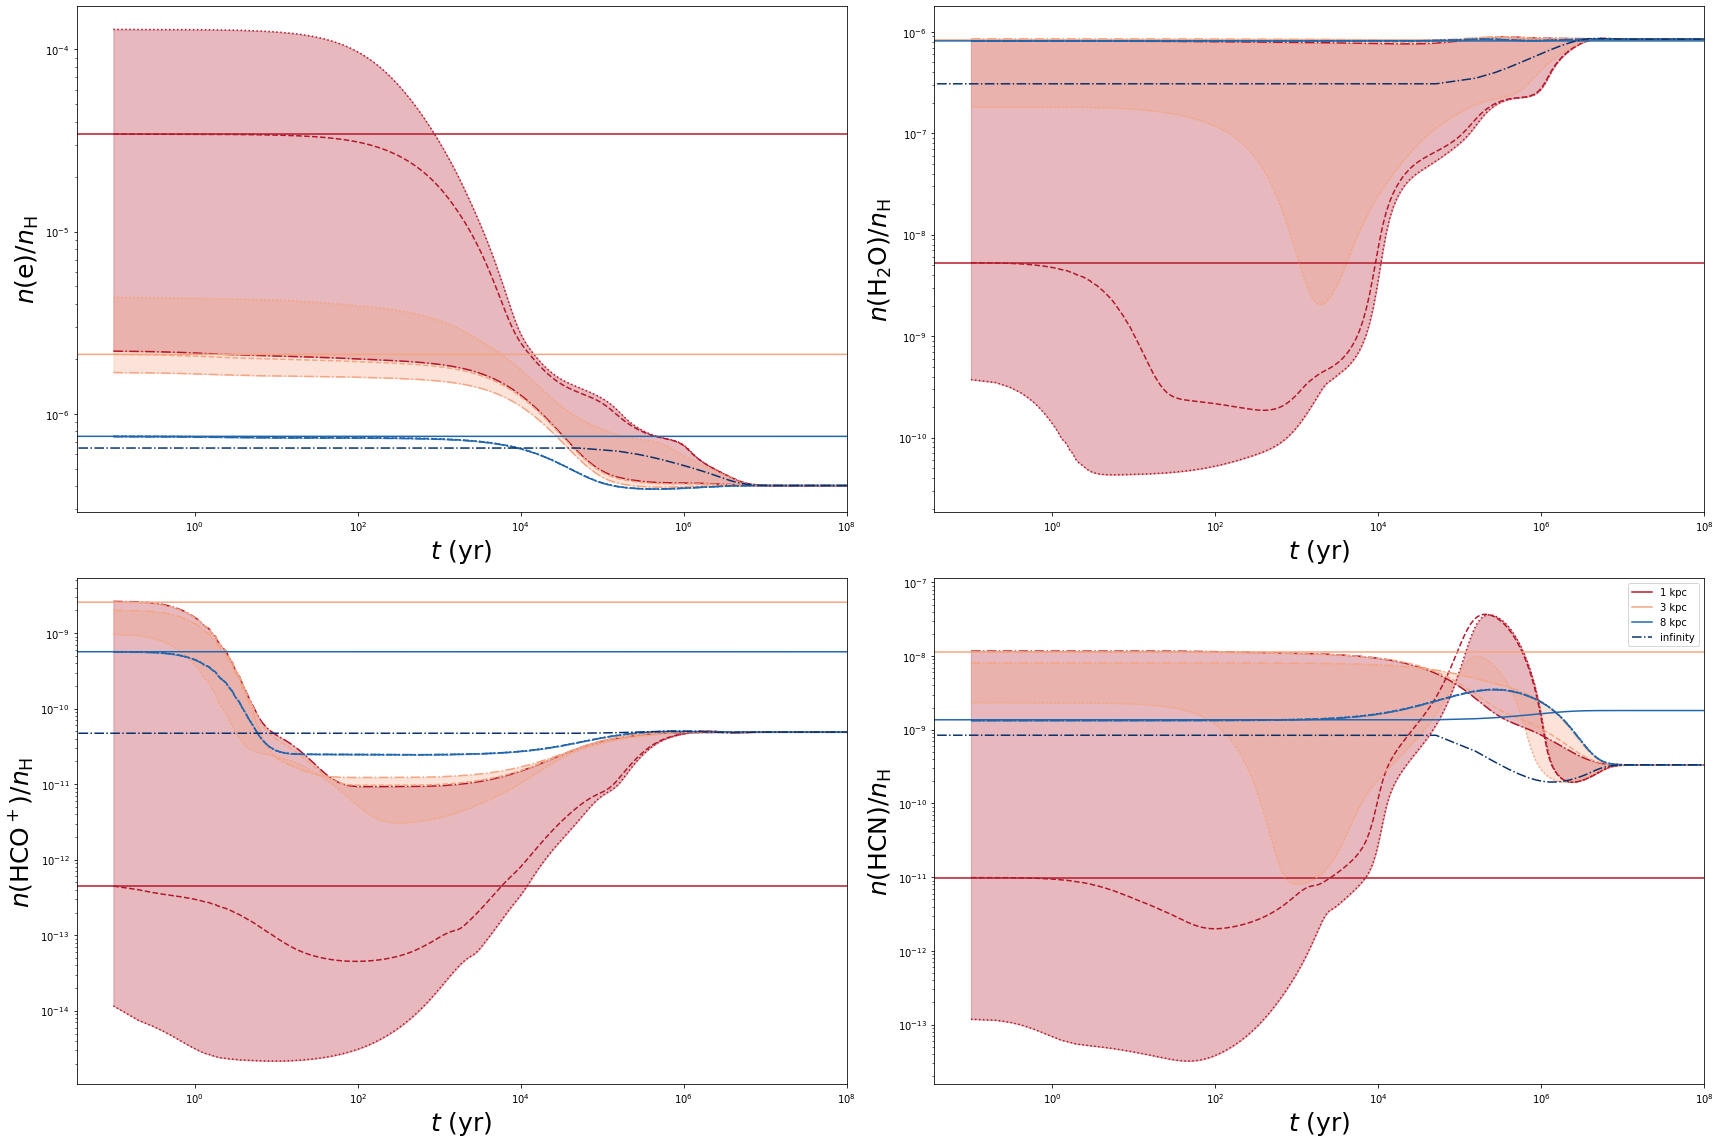

In [15]:
plot_group('E', 'H2O', 'HCOj', 'HCN')